In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
# data prerprocessing
df = pd.read_csv('location.csv')

for i in df.columns:
    if len(df[i].unique()) == 1:
        df.drop(i, axis=1, inplace=True)

df.drop([i for i in df.columns if len(df[i].unique()) == 1], axis=1, inplace=True)
df = pd.read_csv("location.csv")
df.rename(columns={'Country': 'Location'}, inplace=True)

df['Location'] = df['Location'].replace('United States','United States of America',)
location = df

# Load the data into a pandas dataframe
road_safety_data = pd.read_csv("data.csv")
road_safety_data = road_safety_data.groupby('Location')['FactValueNumeric'].sum()

df = road_safety_data.to_frame()
df = df.reset_index()
df = df.rename(columns={'index': 'Location'})
df.sort_values(by = "Location", ascending = True)


# Merge location information with road safety data
road_safety_data = pd.merge(df, location, on='Location', how='left')
# Clean and preprocess the data
road_safety_data = road_safety_data.drop_duplicates()
na_count = road_safety_data.isna().sum()
missing_cols = na_count[na_count > 0].index
road_safety_data[missing_cols] = road_safety_data[missing_cols].fillna(0)


In [3]:
# Create a heatmap based on the number of accidents(deaths)
locations = road_safety_data[['Latitude', 'Longitude']]
accidents_map = folium.Map(location=[51.5074, -0.1278], zoom_start=2)
weights = road_safety_data['FactValueNumeric']
HeatMap(list(zip(locations.Latitude.values, locations.Longitude.values, weights)), gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1.0: 'red'}, min_opacity=0.2).add_to(accidents_map)
accidents_map.save('accidents_heatmap.html')

###### HeatMap representing the number of accidents or deaths occured on road in world.

Note: Embedded HTML page can be only viewed with jupyter notebook

In [4]:
from IPython.display import IFrame
IFrame(src='./accidents_heatmap.html', width=1000, height=500)

Plotting countries which has highest population to analysis the relation between the population and deaths

In [6]:
road_safety_data = pd.read_csv("data.csv")
# print(road_safety_data.head(10))
selected_df = road_safety_data[road_safety_data['Location'].isin(['USA', 'China', 'India', 'Pakisthan', 'Brazil', 'Indonesia', 'Nigeria'])]
fig = px.line(selected_df, x='Period', y='FactValueNumeric', color='Location', title='Road Traffic Deaths by Country and Year')
# Show the plot
fig.show()

Plotting all countries accidents for the give span of time to know the common trend

In [7]:
road_safety_data = pd.read_csv("data.csv")
# print(road_safety_data.head(10))
# selected_df = road_safety_data[road_safety_data['Location'].isin(['USA', 'China', 'India', 'Pakisthan', 'Brazil', 'Indonesia', 'Nigeria'])]
# Create the plot
# print(selected_df)
fig = px.line(road_safety_data, x='Period', y='FactValueNumeric', color='Location', title='Road Traffic Deaths by Country and Year')
# Show the plot
fig.show()

Different plots to know about the dataset.

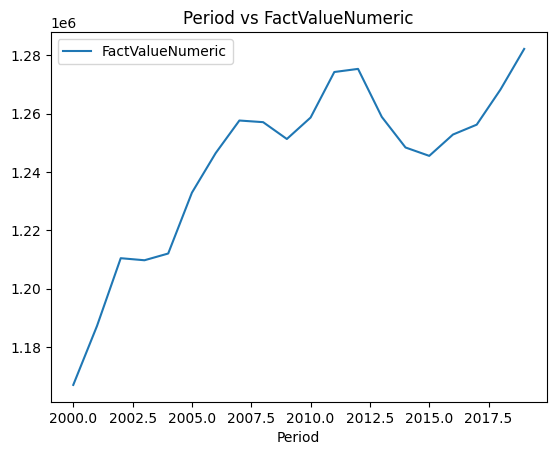

In [9]:
df_x = pd.read_csv('data.csv')
df_x = df_x.groupby("Period")["FactValueNumeric"].sum()
df_x = df_x.to_frame()
df_x = df_x.reset_index()

# plot graph of period and factvaluenumeric 
df_x.plot(x="Period", y="FactValueNumeric", kind="line")
plt.title("Period vs FactValueNumeric")
plt.show()

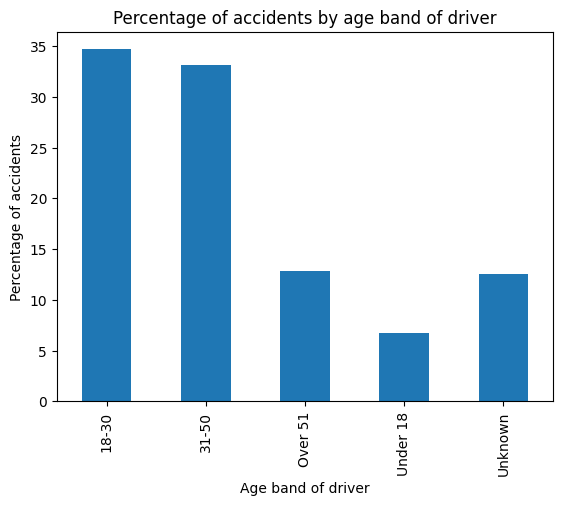

In [10]:
data_3 = pd.read_csv('cleaned.csv')
age_groups = data_3.groupby('Age_band_of_driver').size()
age_pct = age_groups / age_groups.sum() * 100

age_pct.plot(kind='bar')
plt.xlabel('Age band of driver')
plt.ylabel('Percentage of accidents')
plt.title('Percentage of accidents by age band of driver')
plt.show()

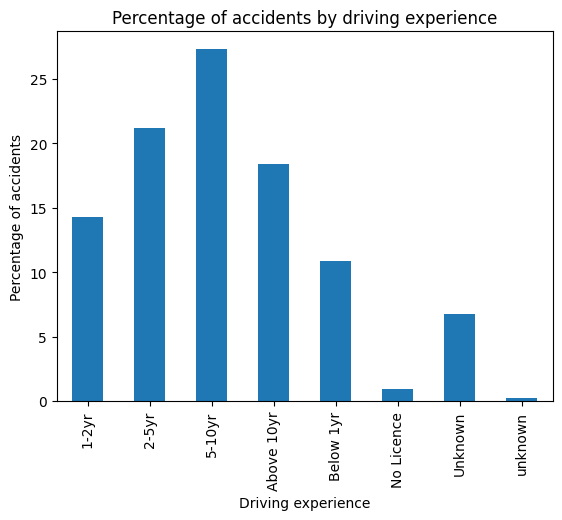

In [12]:
driving_groups = data_3.groupby('Driving_experience').size()
driving_pct = driving_groups / driving_groups.sum() * 100

driving_pct.plot(kind='bar')
plt.xlabel('Driving experience')
plt.ylabel('Percentage of accidents')
plt.title('Percentage of accidents by driving experience')
plt.show()

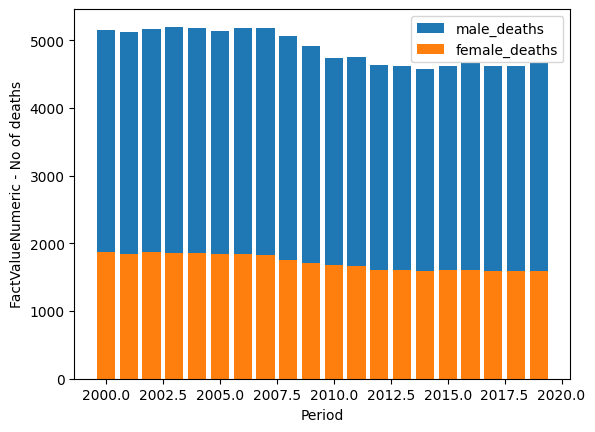

In [13]:
male_data = pd.read_csv('male_data.csv')
female_data = pd.read_csv('female_data.csv')
male_data = male_data.groupby('Period')['FactValueNumeric'].sum().to_frame().reset_index()  
female_data = female_data.groupby('Period')['FactValueNumeric'].sum().to_frame().reset_index()

plt.bar(male_data['Period'], male_data['FactValueNumeric'], label = 'male_deaths')
plt.bar(female_data['Period'], female_data['FactValueNumeric'], label = 'female_deaths')
plt.legend()
plt.xlabel('Period')
plt.ylabel('FactValueNumeric - No of deaths')
plt.show()

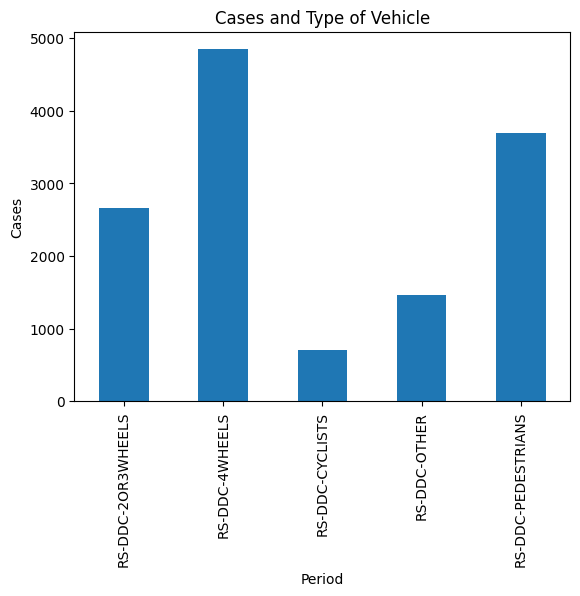

In [14]:
data_2 = pd.read_csv("RS_246.csv")
data_2 = data_2.dropna(axis=1, how='all')
plot_data_2 = data_2.groupby("DisaggregatingDimension1ValueCode")["NumericValue"].sum()
plot_data_2.plot(x='DisaggregatingDimension1ValueCode', y='NumericValue', kind='bar')
plt.title('Cases and Type of Vehicle')
plt.xlabel('Period')
plt.ylabel('Cases')
plt.show()

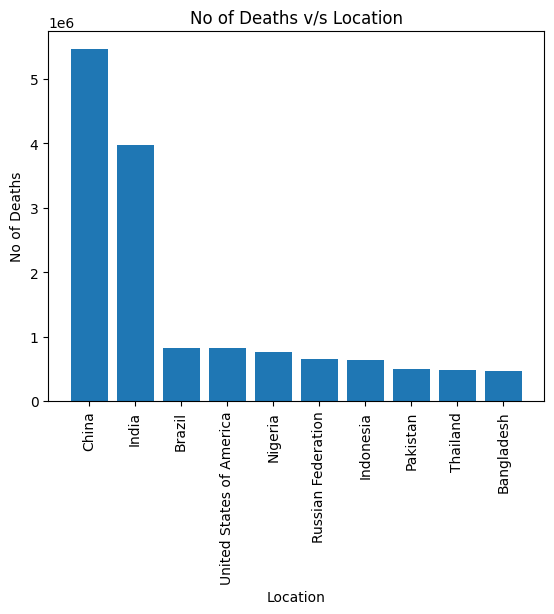

In [15]:
df_x = pd.read_csv('data.csv')
df_x = df_x.groupby("Location")["FactValueNumeric"].sum()
df_x = df_x.to_frame()
df_x = df_x.reset_index()
df_x.sort_values(by=['FactValueNumeric'], inplace=True, ascending=False)


plt.bar(df_x['Location'].head(10), df_x['FactValueNumeric'].head(10))
plt.xlabel('Location')
plt.ylabel('No of Deaths')
plt.title('No of Deaths v/s Location')
plt.xticks(rotation = 90)
plt.show()

In [16]:
df = pd.read_csv('data.csv')
# df["ParentLocation"].unique()

In [17]:
df_Africa = df[df["ParentLocation"]=="Africa"]
df_Americas = df[df["ParentLocation"]=="Americas"]
df_pacific = df[df["ParentLocation"]=="Western Pacific"]
df_medd = df[df["ParentLocation"]=="Eastern Mediterranean"]
df_europe = df[df["ParentLocation"]=="Europe"]
df_Asia = df[df["ParentLocation"]=="South-East Asia"]
df_continent = df.groupby("ParentLocation")["FactValueNumeric"].sum()
df_continent

ParentLocation
Africa                   4746425.48
Americas                 3030029.64
Eastern Mediterranean    2230774.74
Europe                   2090586.37
South-East Asia          6035770.10
Western Pacific          6718368.47
Name: FactValueNumeric, dtype: float64

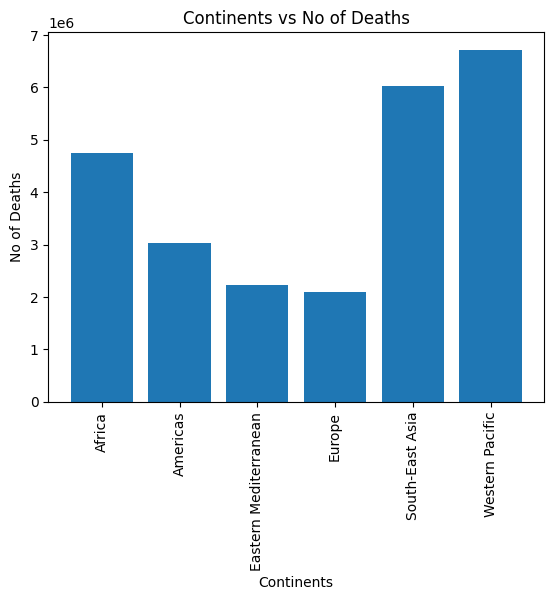

In [18]:
plt.bar(df_continent.index, df_continent)
plt.title("Continents vs No of Deaths")
plt.xlabel("Continents")
plt.ylabel("No of Deaths")
plt.xticks(rotation = 90)
plt.show()

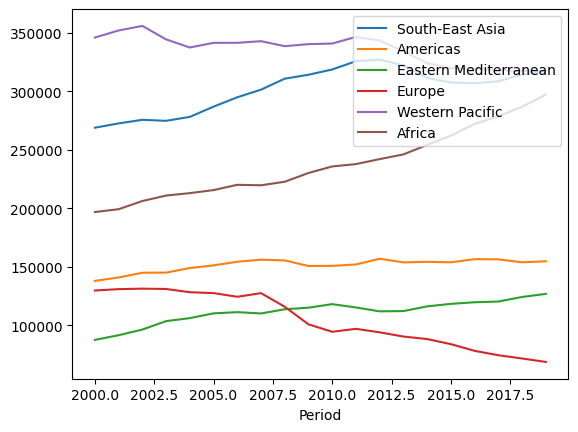

In [19]:
plot_data_2 = df_Asia.groupby("Period")["FactValueNumeric"].sum()
plot_data_2.plot(x='Period', y='NumericValue', label="South-East Asia")

plot_data_2 = df_Americas.groupby("Period")["FactValueNumeric"].sum()
plot_data_2.plot(x='Period', y='NumericValue', label="Americas")

plot_data_2 = df_medd.groupby("Period")["FactValueNumeric"].sum()
plot_data_2.plot(x='Period', y='NumericValue', label="Eastern Mediterranean")

plot_data_2 = df_europe.groupby("Period")["FactValueNumeric"].sum()
plot_data_2.plot(x='Period', y='NumericValue', label="Europe")

plot_data_2 = df_pacific.groupby("Period")["FactValueNumeric"].sum()
plot_data_2.plot(x='Period', y='NumericValue', label="Western Pacific")
plot_data_2 = df_Africa.groupby("Period")["FactValueNumeric"].sum()
plot_data_2.plot(x='Period', y='NumericValue', label="Africa")
plt.legend(loc = 'upper right')
plt.show()

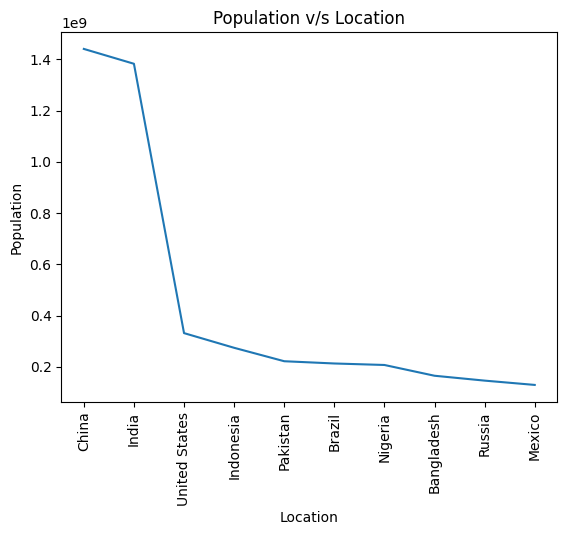

In [20]:
population_data = pd.read_csv('population.csv')
road_safety_data = pd.read_csv('data.csv')

#rename the column of country with location
population_data.rename(columns = {'Country (or dependency)':'Location'}, inplace = True)

population_data.sort_values(by=['Population'], inplace=True, ascending=False)
plt.plot(population_data['Location'].head(10), population_data['Population'].head(10))
plt.xlabel('Location')
plt.ylabel('Population')
plt.title('Population v/s Location')
plt.xticks(rotation = 90)
plt.show()

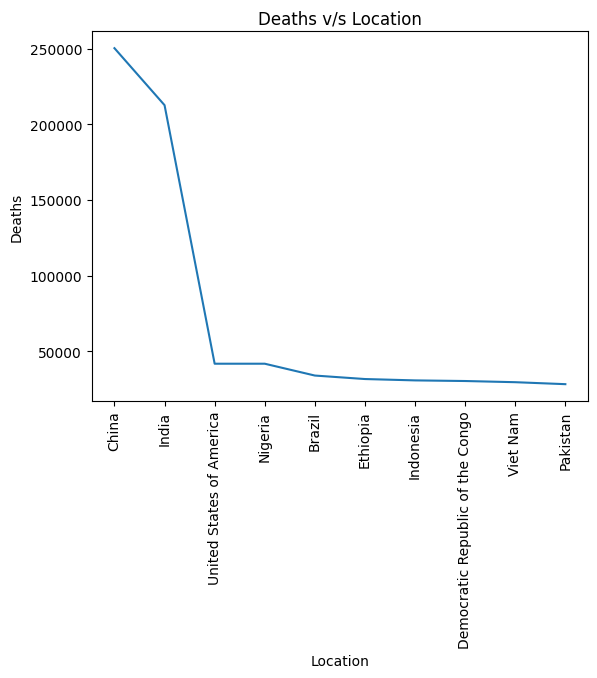

In [21]:
road_safety_data = pd.read_csv('data.csv')

road_safety_data = road_safety_data[road_safety_data['Period'] == 2019]
road_safety_data.sort_values(by=['FactValueNumeric'], inplace=True, ascending=False)
plt.plot(road_safety_data['Location'].head(10), road_safety_data['FactValueNumeric'].head(10))
plt.xlabel('Location')
plt.ylabel('Deaths')
plt.title('Deaths v/s Location')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df = pd.read_csv('data.csv')
df = df.groupby(by =  "Period")["FactValueNumeric"].sum()
df = df.to_frame()
df = df.reset_index()
df

In [ ]:
df.plot(x="Period", y="FactValueNumeric", kind="bar")
plt.title("Period vs Count")
plt.xticks(rotation = 90)
plt.show()